In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_excel('D:/Data Science/Assignment/07Clustring/EastWestAirlines.xlsx',sheet_name='data')

In [10]:
x=df.iloc[:,1:-1].values

In [12]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There is no null value so no need of imputation

In [15]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(df.columns[i],range_x(df.iloc[:,i]),end=' ')
    print()

Balance (0, 1704838) 
Qual_miles (0, 11148) 
cc1_miles (1, 5) 
cc2_miles (1, 3) 
cc3_miles (1, 5) 
Bonus_miles (0, 263685) 
Bonus_trans (0, 86) 
Flight_miles_12mo (0, 30817) 
Flight_trans_12 (0, 53) 
Days_since_enroll (2, 8296) 
Award? (0, 1) 


In [17]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [26]:
#droping the unnecesary columns
df1 = df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','ID#','Award?'],axis=1)
df1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [25]:
x=df1.values

In [24]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [29]:
#get optimum number of clusters
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

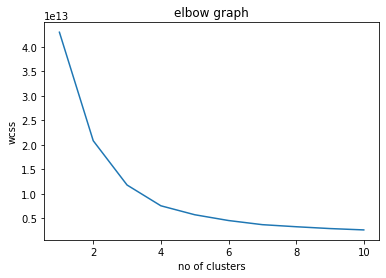

In [31]:
#Elbow graph
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
#elbow ocuurs at 2 and 5
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [37]:
df.iloc[:,1:].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,23969.777635,95.897172,1.499143,1.017995,1.004713,7781.443873,8.364182,239.754927,0.747644,3716.871465,0.304627
4,87260.169091,170.343636,2.713636,1.008182,1.024545,25677.105455,15.082727,589.321818,1.755455,4420.785455,0.418182
1,188243.124153,251.557562,3.038375,1.009029,1.018059,35389.099323,17.643341,1012.386005,2.751693,4978.185102,0.492099
2,402789.029126,416.912621,3.349515,1.029126,1.000000,52104.990291,20.097087,1484.378641,4.650485,5830.456311,0.728155
3,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632,20.894737,1607.526316,6.263158,6642.315789,0.894737


In [39]:
df.iloc[:,[1,2,3,4,5,-1]].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles
cluster,,,,,
0,23969.777635,95.897172,1.499143,1.017995,1.004713
4,87260.169091,170.343636,2.713636,1.008182,1.024545
1,188243.124153,251.557562,3.038375,1.009029,1.018059
2,402789.029126,416.912621,3.349515,1.029126,1.000000
3,922162.526316,564.736842,3.210526,1.000000,1.157895


# Insights

from data it is evident that avg no. of days_since_enroll doesn't mean that no. of miles eligible for award travel will be more.
from data it is evident that avg flight_miles_12mo,Bonus_trans,Bonus_miles  has a direct positive relation with no. of miles eligible for award travel.